## Lecture 12 - Machine Learning II

## LDA and QDA
Linear Discriminant Analysis (discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a linear and a quadratic decision surface, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.



### Usage of LDA

In [3]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)

### Usage of QDA

In [6]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)

#### Examples:

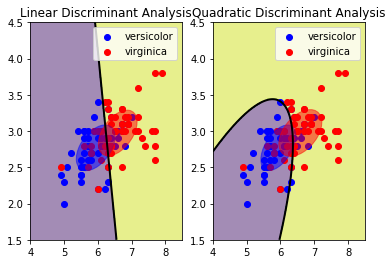

In [8]:
from scipy import linalg
import numpy as np
import pylab as pl
import matplotlib as mpl

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

################################################################################
# load sample dataset
from sklearn.datasets import load_iris
#from scikits.learn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2] # Take only 2 dimensions
y = iris.target
X = X[y > 0]
y = y[y > 0]
y -= 1
target_names = iris.target_names[1:]

################################################################################
# LDA
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)

# QDA
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)

###############################################################################
# Plot results

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    # filled gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

xx, yy = np.meshgrid(np.linspace(4, 8.5, 200), np.linspace(1.5, 4.5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)

pl.figure()
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.5)
pl.scatter(X[y==0,0], X[y==0,1], c='b', label=target_names[0])
pl.scatter(X[y==1,0], X[y==1,1], c='r', label=target_names[1])
pl.contour(xx, yy, zz_lda, [0.5], linewidths=2., colors='k')
plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Linear Discriminant Analysis')

splot = pl.subplot(1, 2, 2)
pl.contourf(xx, yy, zz_qda > 0.5, alpha=0.5)
pl.scatter(X[y==0,0], X[y==0,1], c='b', label=target_names[0])
pl.scatter(X[y==1,0], X[y==1,1], c='r', label=target_names[1])
pl.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'b')
plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'r')
pl.legend()
pl.axis('tight')
pl.title('Quadratic Discriminant Analysis')
pl.show()

In [9]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
lda.fit(X, y).score(X, y)

0.75

In [11]:
qda.fit(X, y).score(X, y)

0.71

## Support Vector Machine
The advantages of support vector machines are:

Effective in high dimensional spaces.   
Still effective in cases where number of dimensions is greater than the number of samples.  
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.  
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.  
SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


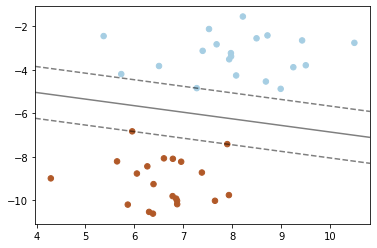

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

In [23]:
clf.decision_function(xy).reshape(XX.shape)


array([[ 5.06722510e+00,  4.77818752e+00,  4.48914993e+00,
         4.20011235e+00,  3.91107477e+00,  3.62203718e+00,
         3.33299960e+00,  3.04396202e+00,  2.75492443e+00,
         2.46588685e+00,  2.17684927e+00,  1.88781168e+00,
         1.59877410e+00,  1.30973652e+00,  1.02069893e+00,
         7.31661350e-01,  4.42623766e-01,  1.53586183e-01,
        -1.35451401e-01, -4.24488984e-01, -7.13526567e-01,
        -1.00256415e+00, -1.29160173e+00, -1.58063932e+00,
        -1.86967690e+00, -2.15871448e+00, -2.44775207e+00,
        -2.73678965e+00, -3.02582723e+00, -3.31486482e+00],
       [ 5.00737673e+00,  4.71833915e+00,  4.42930157e+00,
         4.14026398e+00,  3.85122640e+00,  3.56218882e+00,
         3.27315123e+00,  2.98411365e+00,  2.69507607e+00,
         2.40603848e+00,  2.11700090e+00,  1.82796332e+00,
         1.53892573e+00,  1.24988815e+00,  9.60850566e-01,
         6.71812982e-01,  3.82775399e-01,  9.37378153e-02,
        -1.95299768e-01, -4.84337352e-01, -7.73374935e-

In [123]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [25]:
print(clf.predict(X))

[1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 1 0 1]


In [126]:
clf.score(X,y)

1.0

### SVM: Separating hyperplane for unbalanced classes

/Users/DanWang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


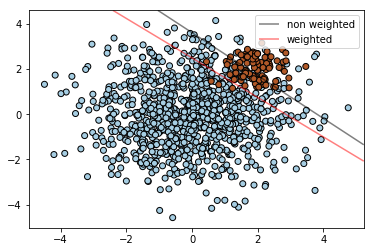

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot separating hyperplanes and samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")

In [128]:
clf.score(X ,y)

0.9409090909090909

In [129]:
wclf.score(X ,y)

0.91

In [ ]:
y[950:]

### Non-linear SVM

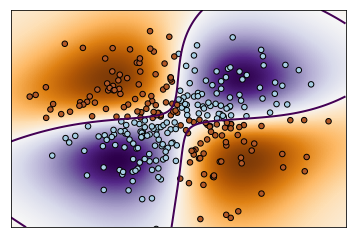

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## Decision Tree and Random Forest

### DT

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

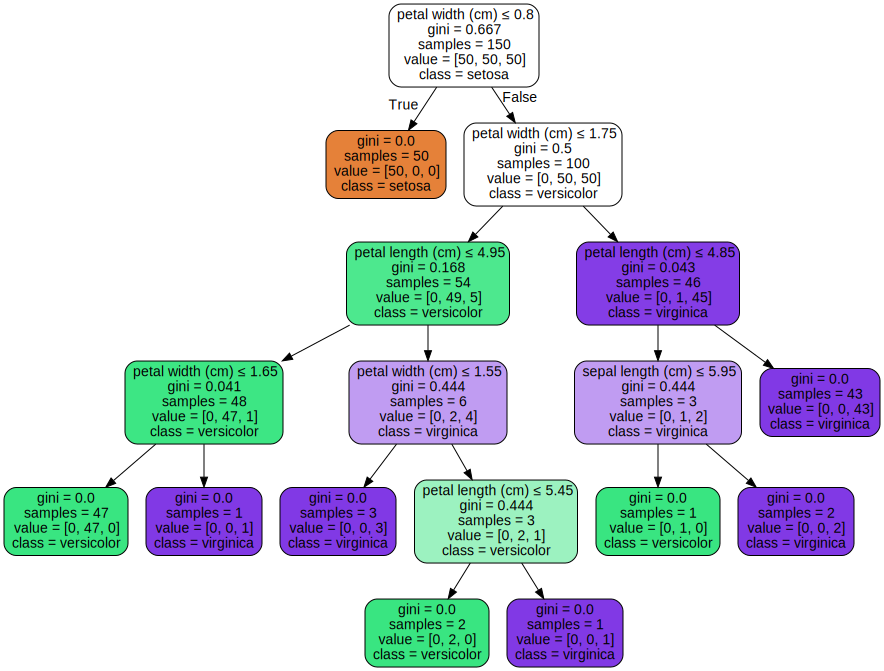

In [4]:
import graphviz # doctest: +SKIP
dot_data = tree.export_graphviz(clf, out_file=None) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("iris") # doctest: +SKIP

dot_data = tree.export_graphviz(clf, out_file=None, # doctest: +SKIP
                            feature_names=iris.feature_names,  # doctest: +SKIP
                            class_names=iris.target_names,  # doctest: +SKIP
                            filled=True, rounded=True,  # doctest: +SKIP
                            special_characters=True)  # doctest: +SKIP
graph = graphviz.Source(dot_data)  # doctest: +SKIP
graph # doctest: +SKIP

If a target is a classification outcome taking on values 0,1,…,K-1, for node , representing a region  with  observations, let  
$ p_{mk} = 1/ N_m \sum_{x_i \in R_m} I(y_i = k) $  
be the proportion of class k observations in node m

Gini coefficent:  
Min: $ H(X_m) = \sum_k p_{mk} (1 - p_{mk}) $

### RF
In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
X, y = make_blobs(n_samples=10000, n_features=10, centers=100,random_state=0)

In [136]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
                             random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean() 

0.9794087938205586

In [137]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,  min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean() 

0.9996078431372549

## Neural network models (supervised)
### Multi-layer Perceptron

Given a set of features X and a target y, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output.

![jupyter](./multilayerperceptron_network.png)
The leftmost layer, known as the input layer, consists of a set of neurons representing the input features. Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation, followed by a non-linear activation function  g- like the hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values

In [141]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
cls = MLPClassifier(hidden_layer_sizes=(100, 1000))
print (cls.fit(X_train,y_train).score(X_test,y_test))
#print('ACC： %s' % cross_val_score(cls, X, y, cv=5).mean())

0.9711111111111111


In [143]:
X.shape

(1797, 64)

## K-Means (unsupervised learning)

{1: 681.3706, 2: 152.34795176035792, 3: 78.85144142614601, 4: 57.228473214285714, 5: 46.472230158730156, 6: 39.03998724608725, 7: 34.299712121212124, 8: 30.063110617452725, 9: 28.27172172856384}


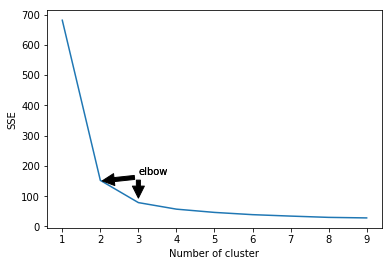

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline 

data, target = load_iris(return_X_y = True)

#print (data, target)
SSE = {}
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    SSE[i] = kmeans.inertia_
print (SSE)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
ax.annotate('elbow', xy=(2, 150), xytext=(3, 170), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('elbow', xy=(3, 90), xytext=(3, 170), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
#fig.savefig('KmeansElbow.jpeg')
